In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [5]:
df = pd.read_csv("CrypotQuant_BTC_20200301-20201004_Prices.csv")
df = df.iloc[::-1]
df['date'] = pd.to_datetime(df['date'])
df.head
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

In [6]:
data = df.sort_index(ascending=True, axis=0)
new_data1 = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_high'])
for i in range(0,len(data)):
    new_data1['date'][i] = data['date'][i]
    new_data1['price_usd_high'][i] = data['price_usd_high'][i]
#    new_data['price_usd_low'][i] = data['price_usd_low'][i]
new_data1.index = new_data1.date
new_data1.drop('date', axis=1, inplace=True)

In [8]:
data = df.sort_index(ascending=True, axis=0)
new_data2 = pd.DataFrame(index=range(0,len(df)),columns=['date', 'price_usd_low'])
for i in range(0,len(data)):
    new_data2['date'][i] = data['date'][i]
#    new_data2['price_usd_high'][i] = data['price_usd_high'][i]
    new_data2['price_usd_low'][i] = data['price_usd_low'][i]
new_data2.index = new_data2.date
new_data2.drop('date', axis=1, inplace=True)



In [9]:
dataset1 = new_data1.values #high
dataset2 = new_data2.values #low

In [10]:
train = dataset2[0:218,] #low

In [17]:
valid = dataset1[0:306,] #high

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data1 = scaler.fit_transform(dataset1) #high
scaled_data2 = scaler.fit_transform(dataset2) #low

In [13]:
x_train, y_train = [], []
for i in range(42,129):
    x_train.append(scaled_data2[i-42:i,0]) #low
    y_train.append(scaled_data2[88+i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

87/87 - 1s - loss: 0.0382


In [25]:
inputs = valid
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [26]:
X_test_valid = []
for i in range(42,129):
    X_test_valid.append(inputs[i-42:i,0])
X_test_valid = np.array(X_test_valid)

In [30]:
X_test_valid = np.reshape(X_test_valid, (X_test_valid.shape[0],X_test_valid.shape[1],1))
pred_price_valid = model.predict(X_test_valid)
pred_price_valid = scaler.inverse_transform(pred_price_valid)

In [29]:
X_test = []
for i in range(129,217):
    X_test.append(inputs[i-42:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

<ipython-input-45-56a26f970990>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['valid'] = pred_price_valid
<ipython-input-45-56a26f970990>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['pred'] = pred_price


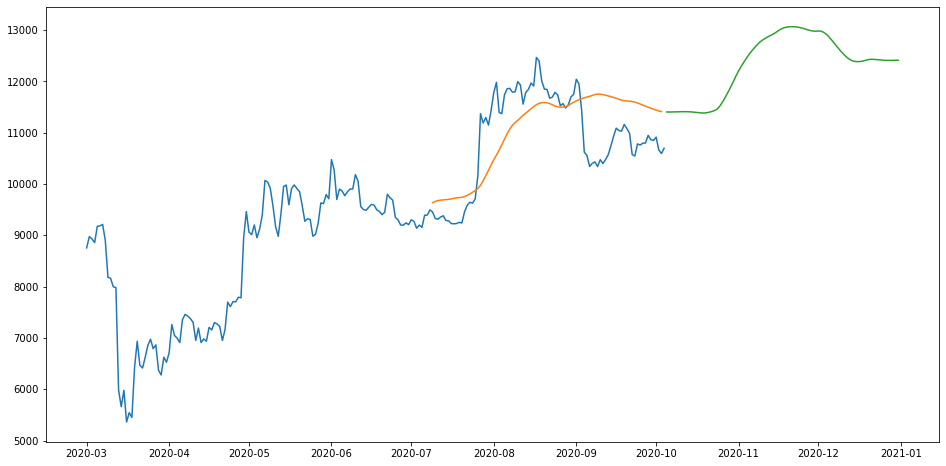

In [45]:
plt.figure(figsize=(16,8))
df1 = df[:218]
df2 = df[130:217]
df2['valid'] = pred_price_valid
df3 = df[218:]
df3['pred'] = pred_price

plt.plot(df1['price_usd_high'])
plt.plot(df2['valid'])
plt.plot(df3['pred'])

#Blue is actual, green is the test dataset that’s predicted, orange is the predict of future price 